# Predicting House Prices with Linear Regression

In [60]:
#Import necessary libraries....
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Loading data into dataframe

In [61]:
housing_datasets=pd.read_csv("C:\\Users\\khush\\Desktop\\Data Analysts\\OASIS INFOBYTE\\Predicting House Prices with Linear Regression\\Datasets\\Housing.csv")

In [62]:
# Check the head of the dataset
housing_datasets.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Inspection

In [63]:
housing_datasets.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [64]:
housing_datasets.shape


(545, 13)

In [65]:
housing_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [66]:
housing_datasets.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# Data Processing

In [67]:
housing_datasets.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Above analysis shows that there is no missing values

In [11]:
duplicates=housing_datasets.duplicated()
duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool

if df.duplicated() returns True for a particular row, it means that the row is a duplicate of a previous row in the DataFrame. In other words, the values in that row are exactly the same as the values in another row that occurs earlier in the DataFrame.

In [68]:
# Count the number of duplicates
num_duplicates = duplicates.sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


Both of above analysis is data is cleaned for processing

# Outliers

Outliers refer to data points that significantly differ from other observations in a dataset. These data points can skew statistical analyses and models, potentially leading to incorrect conclusions if not properly addressed. Identifying and handling outliers is an important step in data preprocessing and analysis

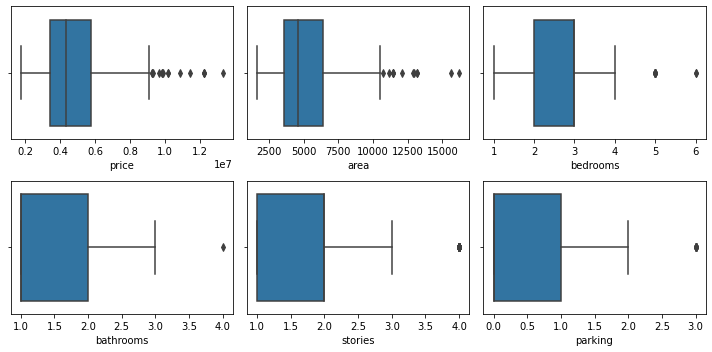

In [69]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing_datasets['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing_datasets['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing_datasets['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing_datasets['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing_datasets['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing_datasets['parking'], ax = axs[1,2])

plt.tight_layout()

# Dealing with Outliers

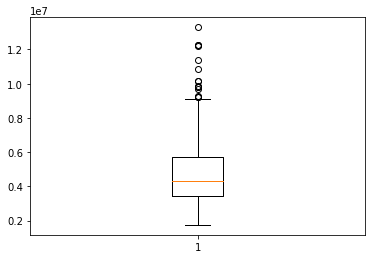

In [70]:
# outlier treatment for price
plt.boxplot(housing_datasets.price)
Q1 = housing_datasets.price.quantile(0.25)
Q3 = housing_datasets.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing_datasets[(housing_datasets.price >= Q1 - 1.5*IQR) & (housing_datasets.price <= Q3 + 1.5*IQR)]

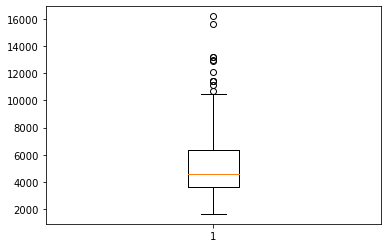

In [71]:
# outlier treatment for area
plt.boxplot(housing_datasets.area)
Q1 = housing_datasets.area.quantile(0.25)
Q3 = housing_datasets.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing_datasets[(housing_datasets.area >= Q1 - 1.5*IQR) & (housing_datasets.area <= Q3 + 1.5*IQR)]

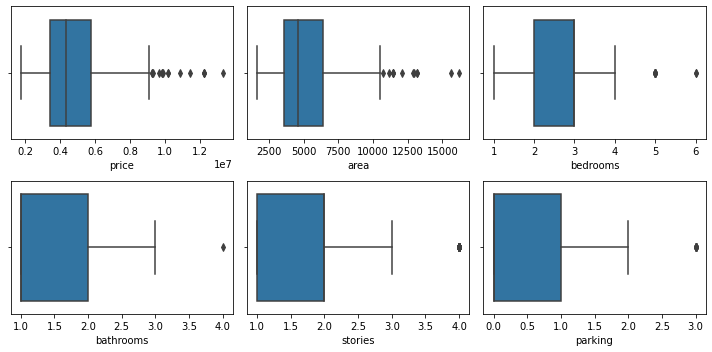

In [72]:
#After dealing with outliers:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing_datasets['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing_datasets['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing_datasets['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing_datasets['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing_datasets['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing_datasets['parking'], ax = axs[1,2])

plt.tight_layout()

# Exploratory Data Analytics

# Numerical Variables

In [73]:
# list of numerical variables
numerical_features = [feature for feature in housing_datasets.columns if housing_datasets[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
housing_datasets[numerical_features].head()

Number of numerical variables:  6


,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


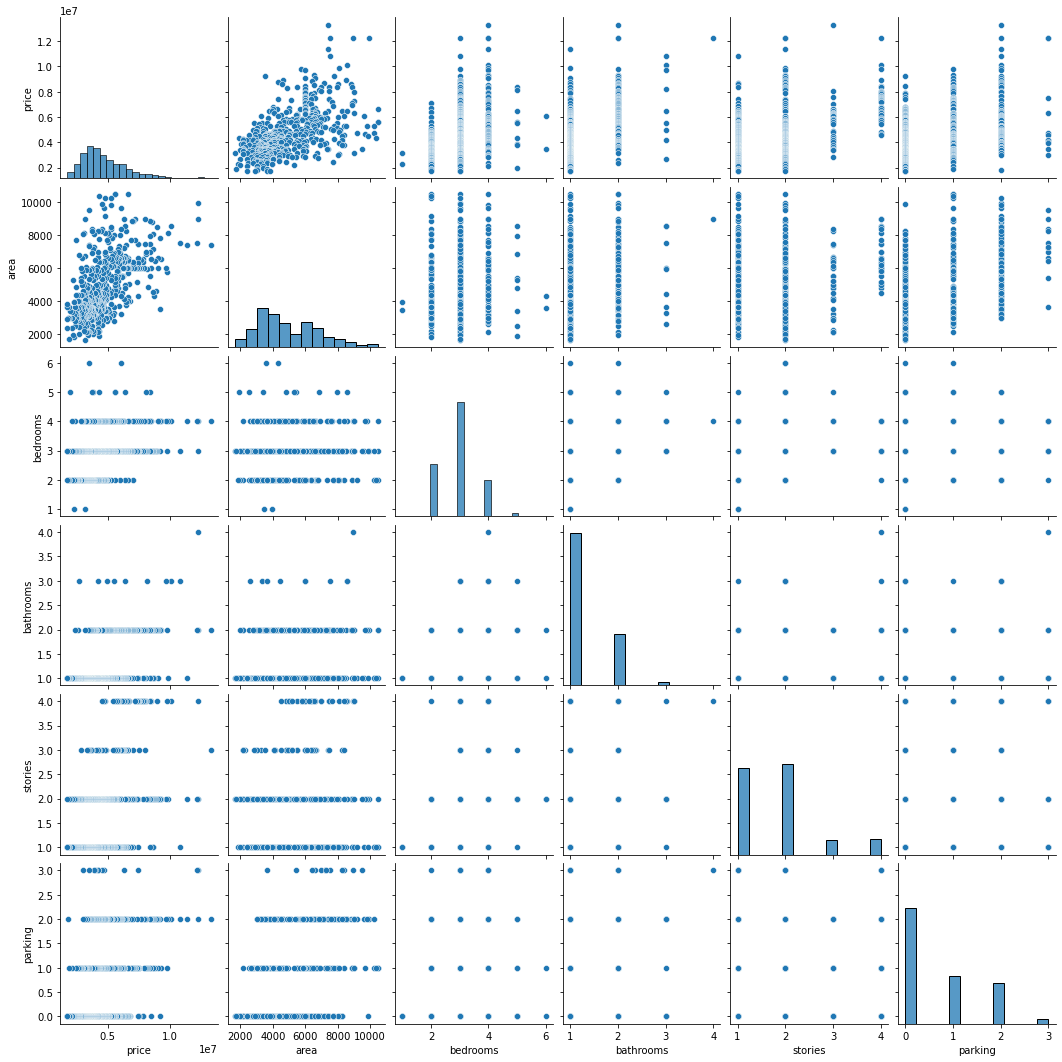

In [74]:
sns.pairplot(housing)
plt.show()

# Categorical Variables

In [75]:
categorical_features=[feature for feature in housing_datasets.columns if housing_datasets[feature].dtypes=='O']
len(categorical_features)

7

In [76]:
housing_datasets[categorical_features].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


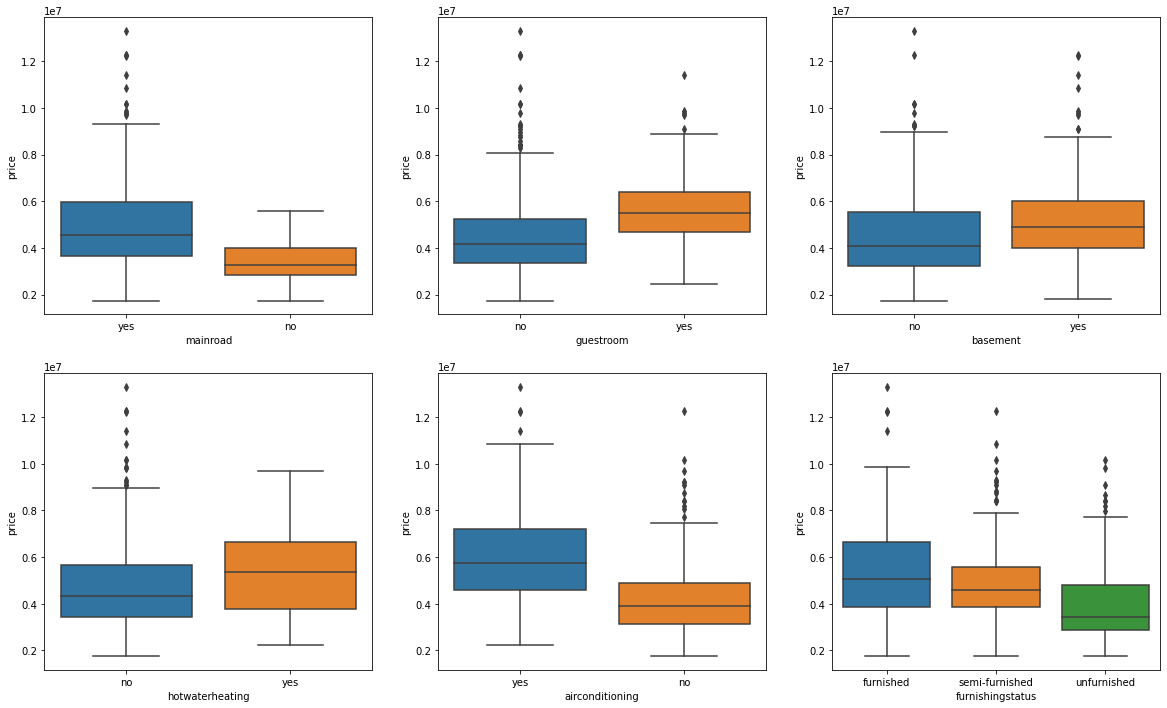

In [37]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing_datasets)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing_datasets)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing_datasets)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing_datasets)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing_datasets)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing_datasets)
plt.show()

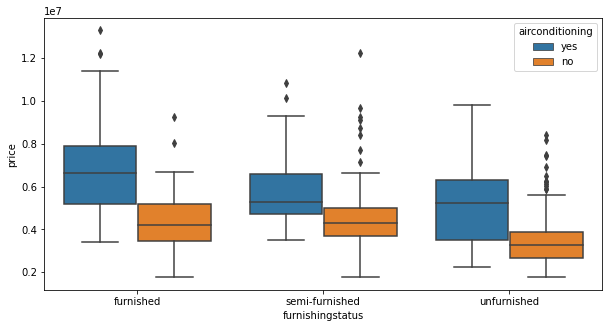

In [77]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

# Data Preparation

You can see that your dataset has many columns with values as 'Yes' or 'No'.

But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [78]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [79]:
# Check the housing dataframe now

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


Dummy Variables

The variable furnishingstatus has three levels. We need to convert these levels into integer as well.

For this, we will use something called dummy variables.

In [80]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing_datasets['furnishingstatus'])

In [81]:
# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


Now, you don't need three columns. You can drop the furnished column, as the type of furnishing can be identified with just the last two columns where —

00 will correspond to furnished

01 will correspond to unfurnished

10 will correspond to semi-furnished

In [82]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(housing_datasets['furnishingstatus'], drop_first = True)
# Add the results to the original housing dataframe

housing = pd.concat([housing_datasets, status], axis = 1)
# Now let's see the head of our dataframe.

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,0,0


In [83]:
# Drop 'furnishingstatus' as we have created the dummies for it

housing.drop(['furnishingstatus'], axis = 1, inplace = True)

Splitting the Data into Training and Testing Sets

In [84]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

Rescaling the Features

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [86]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [87]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,yes,no,no,no,no,0.333333,no,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,yes,no,no,no,yes,0.333333,yes,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,yes,yes,yes,no,yes,0.000000,no,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,yes,no,no,no,yes,0.666667,no,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,yes,no,yes,yes,no,0.666667,no,0,1


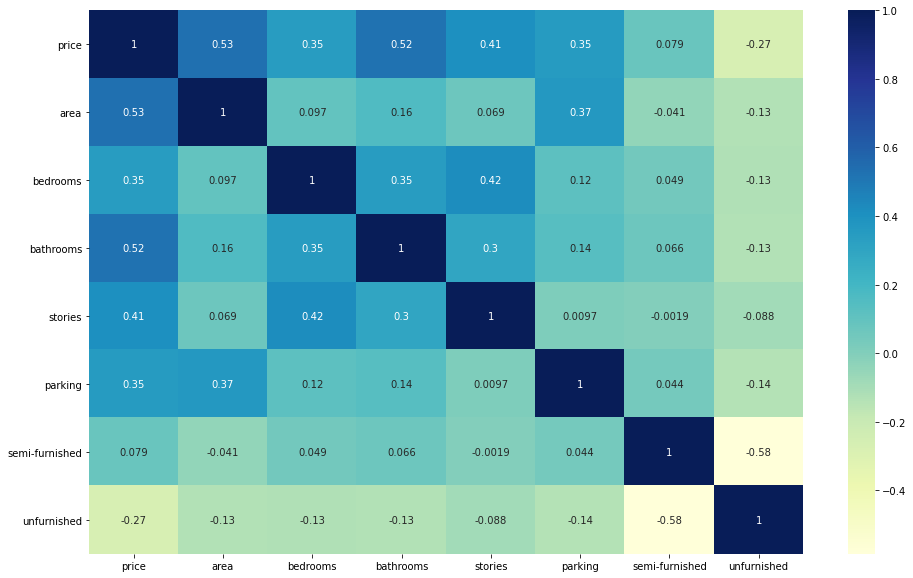

In [88]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, area seems to the correlated to price the most. Let's see a pairplot for area vs price.

In [109]:
housing_datasets_encoded = pd.get_dummies(housing_datasets)

In [110]:
X = housing_datasets_encoded.drop('price', axis=1)
y = housing_datasets_encoded['price']


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [112]:
scaler = StandardScaler()

# Model Building

In [113]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [117]:
# Make predictions
y_pred = model.predict(X_test)

In [120]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [121]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1754318687330.6611
R-squared: 0.6529242642153189


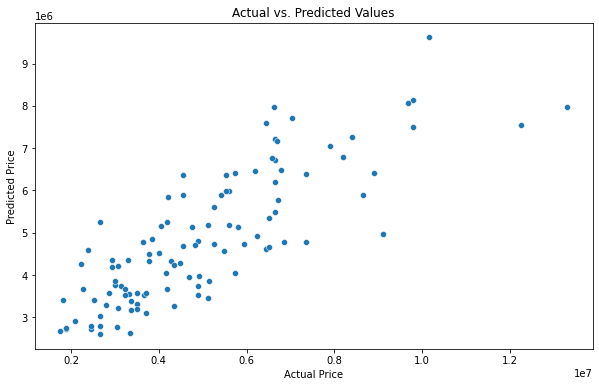

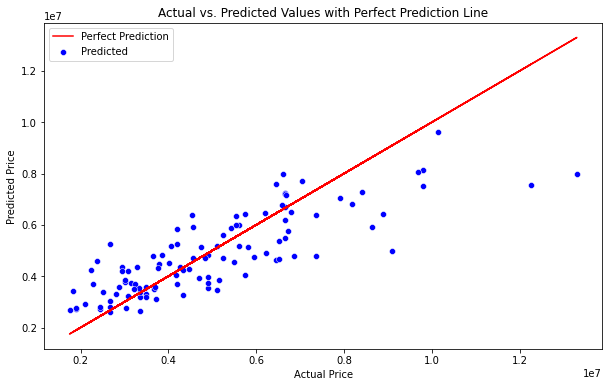

In [122]:
#Create a DataFrame for actual vs. predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Additionally, you can plot a line indicating perfect predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results, color='blue', label='Predicted')
plt.plot(results['Actual'], results['Actual'], color='red', label='Perfect Prediction')
plt.title('Actual vs. Predicted Values with Perfect Prediction Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()